# 2.1 Moving Average Models (MA models)

Time series models known as **ARIMA** models may include *autoregressive terms* and *moving average terms*.

A **moving average** term in a time series model is a past error(mutiplied by a coefficient)

Let $w_{t} \stackrel{iid}{\sim} N(0, \sigma_{w}^2)$

The **1st order moving average model**, denoted by **MA(1)** is

$x_{t} = \mu + w_{t} + \theta_{1}w_{t-1}$

The **2nd order moving average model**, denoted by MA(2) is

$x_{t} = \mu + w_{t} + \theta_{1}w_{t-1}+\theta_{2}w_{t-2}$

The **$q^{th}$ order moving average model**, denoted by MA(q) is

$x_{t} = \mu + w_{t} + \theta_{1}w_{t-1}+\theta_{2}w_{t-2}+...+\theta_{q}w_{t-q}$

#### Theoretical Properties of a Time Series with an MA(1) Model
* mean is $E(x_{t}) = \mu$
* Variance is $Var(x_{t}) = \sigma_{w}^2(1+\theta_{1})$
* Auto correlation function ACF is : 
$\rho_{1} = \frac{\theta_{1}}{1+\theta_{1}^2}$, and $\rho_{h} = 0$  for $h \geq 2$

Note that the only *nonzero value in the theoretical ACF is for lag 1*.  All other autocorrelations are 0.  Thus a sample ACF with a significant autocorrelation only at lag 1 is an indicator of a possible MA(1) model.

#### Example 1
Lets similate an MA(1) model

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib
import matplotlib.pyplot as plt
import warnings
matplotlib.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline

Suppose that an MA(1) model is $x_{t} = 10 + w_{t}+0.7 w_{t-1}$ where $w_{t} \stackrel{iid}{\sim} N(0, \sigma_{w}^2)$. The theoratical ACF is given by 

$\rho_{1} = \frac{0.7}{1+0.7^2} = 0.4698$ and $\rho_{h} = 0$ for $h \geq 2$ 

In [5]:
mu = 10
ar= np.array([1])
ma = np.array([1, 0.7])
arma_process = ArmaProcess(ar, ma)
sample1 = mu + arma_process.generate_sample(nsample=100)

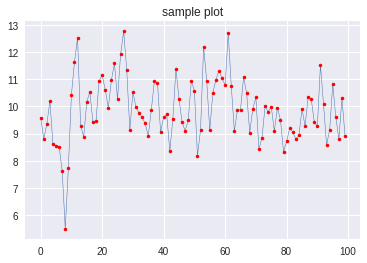

In [9]:
plt.plot(sample1, lw=0.5, marker='.', markerfacecolor='r', markeredgecolor='r')
plt.title("sample plot")
plt.show()

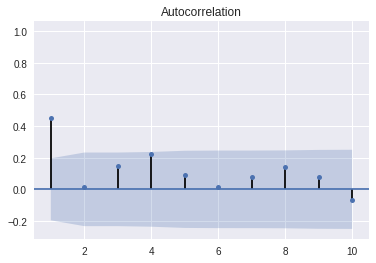

In [13]:
plot_acf(sample1,lags=10)
plt.xlim(0.5,)
plt.show()

The sample ACF for the simulated data follows.  We see a “spike” at lag 1 followed by generally non-significant values for lags past 1.  Note that the sample ACF does not match the theoretical pattern of the underlying MA(1), which is that all autocorrelations for lags past 1 will be 0.  A different sample would have a slightly different sample ACF shown below, but would likely have the same broad features.